In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movies_df = pd.read_csv("C:\\Users\\Prabin\\Movies-list.csv", encoding='latin-1')

In [25]:
movies_df.sample(10, random_state=99)

,Day_of_Week,Director,Genre,Title,Release_date,Studio,Adjusted_Gross_mill,Budget_in_million,Gross_collection_mill,IMDb_Rating,MovieLens_Rating,Overseas_mill,Overseas_percent,Profit_in_mill,Profit_percent,Runtime_in_minutes,US_mill,Gross_percent_US
279,Friday,Matthew Vaughn,action,Kingsman: The Secret Service,13/02/2015,Fox,403.8,81.0,403.8,7.9,3.66,275.5,68.2,322.8,398.5,129,128.2,31.8
555,Friday,Alfonso Cuarn,adventure,Harry Potter and the Prisoner of Azkaban,4/06/2004,WB,"1,003",130.0,796.7,7.8,3.75,547.1,68.7,666.7,512.9,141,249.5,31.3
364,Friday,Tim Burton,action,Planet of the Apes (2001),27/07/2001,Fox,486.4,100.0,362.2,5.7,2.74,182.2,50.3,262.2,262.2,119,180.0,49.7
86,Friday,Cameron Crowe,mystery,Vanilla Sky,14/12/2001,Paramount Pictures,273.1,70.0,203.4,6.9,3.36,102.8,50.5,133.4,190.6,136,100.6,49.5
10,Friday,Eric Brevig,animation,Yogi Bear,17/12/2010,WB,219.9,80.0,201.6,4.5,2.17,101.3,50.3,121.6,152.0,80,100.2,49.7
171,Friday,"Steve Hickner, Simon J. Smith",animation,Bee Movie,2/11/2007,Pacific Data/DreamWorks,329.9,150.0,287.6,6.2,3.01,161,56.0,137.6,91.7,91,126.6,44.0
107,Friday,David Zucker,comedy,Scary Movie 3,24/10/2003,Dimension Films,285.2,45.0,220.7,5.4,2.46,110.7,50.2,175.7,390.4,84,110.0,49.8
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
543,Thursday,Steven Spielberg,action,The Lost World: Jurassic Park,22/05/1997,Universal,916.5,75.0,618.6,6.5,2.96,389.6,63.0,543.6,724.8,129,229.1,37.0
48,Thursday,Doug Liman,action,Jumper,14/02/2008,Fox,245.4,82.5,222.2,6.1,2.98,142.1,63.9,139.7,169.3,88,80.2,36.1


In [5]:
movies_df.shape

(608, 18)

In [6]:
movies_df.columns

Index(['Day of Week', 'Director', 'Genre', 'Movie Title', 'Release Date',
       'Studio', 'Adjusted Gross ($mill)', 'Budget ($mill)', 'Gross ($mill)',
       'IMDb Rating', 'MovieLens Rating', 'Overseas ($mill)', 'Overseas%',
       'Profit ($mill)', 'Profit%', 'Runtime (min)', 'US ($mill)',
       'Gross % US'],
      dtype='object')

In [7]:
movies_df.columns = ['Day_of_Week', 'Director', 'Genre', 'Title', 'Release_date', 'Studio',
                     'Adjusted_Gross_mill','Budget_in_million', 'Gross_collection_mill',
                     'IMDb_Rating', 'MovieLens_Rating', 'Overseas_mill', 'Overseas_percent',
                     'Profit_in_mill', 'Profit_percent', 'Runtime_in_minutes',
                     'US_mill', 'Gross_percent_US']


In [8]:
movies_df.columns

Index(['Day_of_Week', 'Director', 'Genre', 'Title', 'Release_date', 'Studio',
       'Adjusted_Gross_mill', 'Budget_in_million', 'Gross_collection_mill',
       'IMDb_Rating', 'MovieLens_Rating', 'Overseas_mill', 'Overseas_percent',
       'Profit_in_mill', 'Profit_percent', 'Runtime_in_minutes', 'US_mill',
       'Gross_percent_US'],
      dtype='object')

In [107]:
movies_df.size

10944

In [11]:
movies_df.isnull().sum()

Day_of_Week              0
Director                 0
Genre                    0
Title                    0
Release_date             0
Studio                   0
Adjusted_Gross_mill      0
Budget_in_million        0
Gross_collection_mill    0
IMDb_Rating              0
MovieLens_Rating         0
Overseas_mill            0
Overseas_percent         0
Profit_in_mill           0
Profit_percent           0
Runtime_in_minutes       0
US_mill                  0
Gross_percent_US         0
dtype: int64

In [15]:
movies_df.duplicated().value_counts()

False    608
Name: count, dtype: int64

In the above dataframe there is no any null value and duplicated values. So, we don't have to deal with it we keep data as it is.

In [123]:
movies_df[['IMDb_Rating', 'MovieLens_Rating']].corr()

,IMDb_Rating,MovieLens_Rating
IMDb_Rating,1.000000,0.879836
MovieLens_Rating,0.879836,1.000000


In [124]:
movies_df['Studio'].unique()

array(['Buena Vista Studios', 'Lionsgate', 'Sony', 'Universal',
       'Paramount Pictures', 'WB', 'Weinstein Company',
       'UA Entertainment', 'WB/New Line', 'New Line Cinema', 'Fox',
       'TriStar', 'Relativity Media', 'Screen Gems', 'StudioCanal',
       'Fox Searchlight Pictures', 'MiraMax', 'Path_ Distribution',
       'DreamWorks', 'Lionsgate Films', 'Revolution Studios',
       'Dimension Films', 'USA', 'Lionsgate/Summit',
       'Sony Picture Classics', 'Pacific Data/DreamWorks', 'Disney',
       'Art House Studios', 'Colombia Pictures', 'Gramercy Pictures',
       'Summit Entertainment', 'Vestron Pictures', 'MGM', 'Orion', 'IFC',
       'New Market Films'], dtype=object)

#### Lets see visually, which studio produce most number of movies.

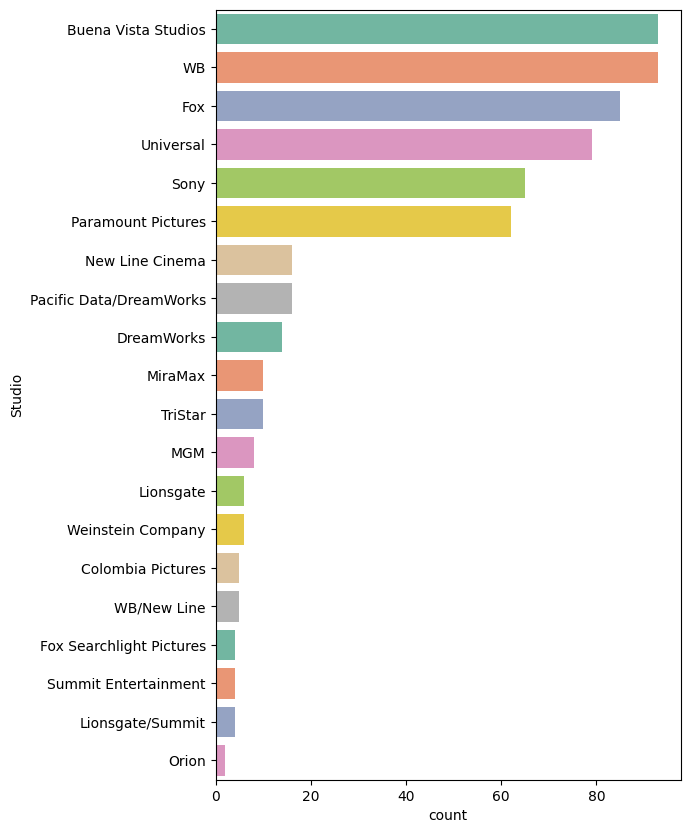

In [125]:
plt.figure(figsize=(6, 10), dpi=100)
sns.countplot(y="Studio", data=movies_df, palette="Set2", order=movies_df['Studio'].value_counts().index[0:20])
plt.show()

<br>

#### Lets see what genre of movies are most in this dataset.

In [129]:
movies_df['Genre'].unique()

array(['action', 'comedy', 'adventure', 'horror', 'animation',
       'biography', 'drama', 'musical', 'sci-fi', 'crime', 'romance',
       'fantasy', 'mystery', 'thriller', 'documentary'], dtype=object)

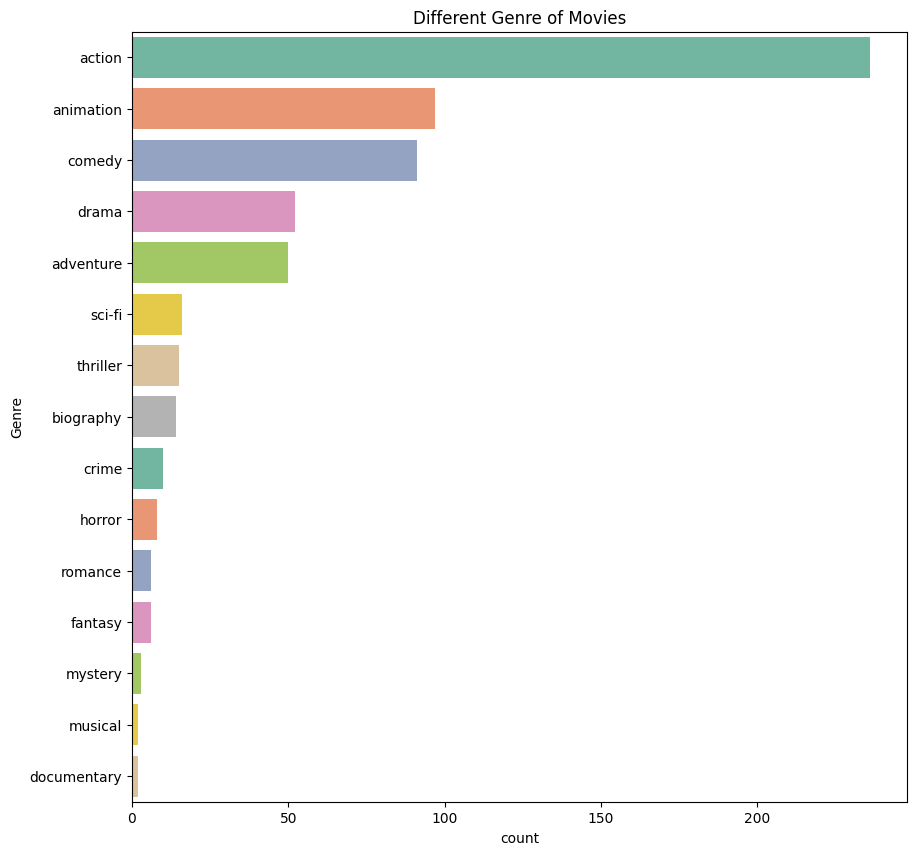

In [133]:
plt.figure(figsize=(10, 10), dpi=100)
sns.countplot(y="Genre", data=movies_df, palette="Set2", order=movies_df['Genre'].value_counts().index[0:15])
plt.title("Different Genre of Movies")
plt.show()


<br>

In [131]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Day_of_Week            608 non-null    object 
 1   Director               608 non-null    object 
 2   Genre                  608 non-null    object 
 3   Title                  608 non-null    object 
 4   Release_date           608 non-null    object 
 5   Studio                 608 non-null    object 
 6   Adjusted_Gross_mill    608 non-null    object 
 7   Budget_in_million      608 non-null    float64
 8   Gross_collection_mill  608 non-null    object 
 9   IMDb_Rating            608 non-null    float64
 10  MovieLens_Rating       608 non-null    float64
 11  Overseas_mill          608 non-null    object 
 12  Overseas_percent       608 non-null    float64
 13  Profit_in_mill         608 non-null    object 
 14  Profit_percent         608 non-null    float64
 15  Runtim

In [132]:
movies_df['Profit_in_mill'].dtype

dtype('O')

array(['action', 'comedy', 'adventure', 'horror', 'animation',
       'biography', 'drama', 'musical', 'sci-fi', 'crime', 'romance',
       'fantasy', 'mystery', 'thriller', 'documentary'], dtype=object)

In [82]:
movies_df.nunique()

Day_of_Week                6
Director                 337
Genre                     15
Title                    608
Release_date             534
Studio                    36
Adjusted_Gross_mill      585
Budget_in_million        152
Gross_collection_mill    561
IMDb_Rating               50
MovieLens_Rating         182
Overseas_mill            551
Overseas_percent         328
Profit_in_mill           566
Profit_percent           589
Runtime_in_minutes       102
US_mill                  535
Gross_percent_US         328
dtype: int64